In [1]:
!pip install torch torchvision matplotlib

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

caltech_dataset = datasets.Caltech101(
    root = "./data/",
    transform=data_transform,
    download=True
)

In [4]:
print(caltech_dataset)

Dataset Caltech101
    Number of datapoints: 8677
    Root location: ./data/caltech101
    Target type: ['category']
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [5]:
print(len(caltech_dataset))
print("Number of classes:", len(caltech_dataset.categories))
print("Example classes:", caltech_dataset.categories[:5])

8677
Number of classes: 101
Example classes: ['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion']


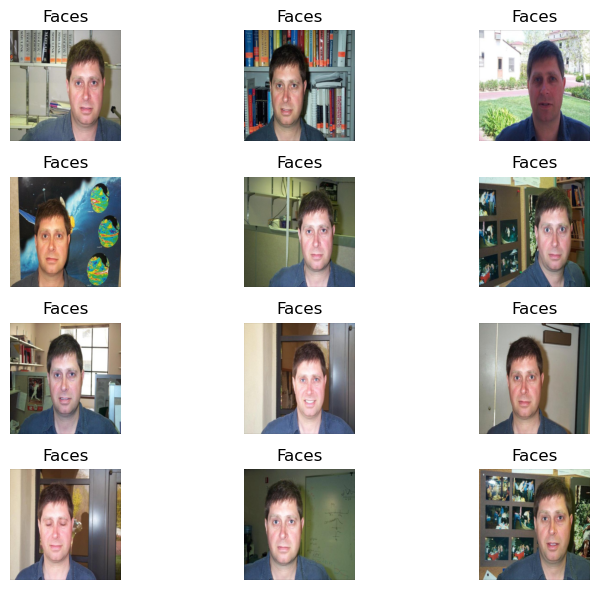

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    img, label = caltech_dataset[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(caltech_dataset.categories[label])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [7]:
airplane_index = caltech_dataset.categories.index("airplanes")
print("Label index for airplanes:", airplane_index)

Label index for airplanes: 5


In [8]:
# get indices where the label equals the class index
indices = [i for i, (_, label) in enumerate(caltech_dataset) if label == airplane_index]
airplane_subset = torch.utils.data.Subset(caltech_dataset, indices)

print("Number of airplane images:", len(airplane_subset))

Number of airplane images: 800


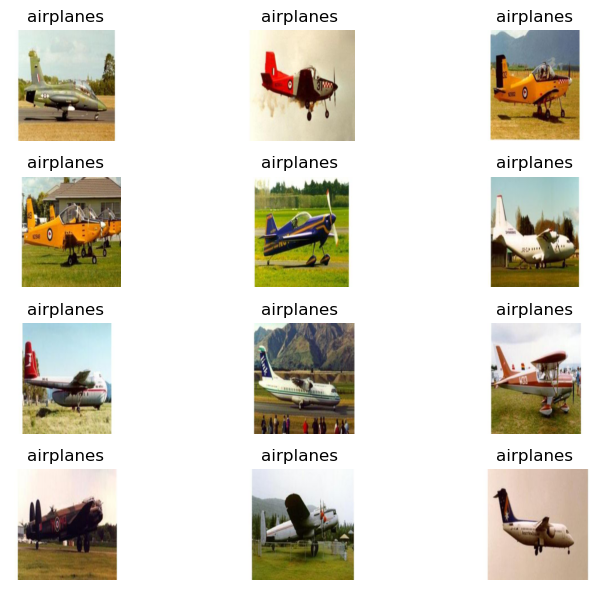

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    img, label = airplane_subset[i]
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(caltech_dataset.categories[label])
    ax.axis("off")

plt.tight_layout()
plt.show()

In [14]:
from src.data import get_data_loaders

train_load, test_load, dataset = get_data_loaders()

images, labels = next(iter(train_load))
print("Batch shape:", images.shape)
print("Example label:", labels[0].item(), "->", dataset.categories[labels[0].item()])

Dataset found locally.
Loaded dataset.

Dataset Size: 8677

Categories:['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner',